<a href="https://colab.research.google.com/github/ldcss/Numeric-Methods/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise do cenário de COVID-19, no contexto inicial da pandemia, em função do modelo epidemiológico SIQR**

###**Grupo: Lucas Daniel Costa da Silva (ldcs), Giovanny Lira de Araujo Cunha (glac2), Joao Pedro de Albuquerque Maranhao(jpamm)**

# ***RESUMO***
  Em 31 de dezembro de 2019,a OMS(organização mundial de saude) foi notificada sobre casos de uma possível nova pandemia que estava a propagar por Wuhan [1] ,na China,dois anos após esse alerta tal doença vitimou mais de 6,58 milhões de pessoas em todo globo [2] . Motivado por esse contexto de pandemia e dado as medidas que se tomaram em seguida, tais como vacinação e lockdowns, resolvemos fazer um estudo sobre a evolução da covid em Pernambuco usando um modelo de EDOS e considerando um contexto onde apenas medidas de isolamento foram tomadas. Permitindo analisar como o número de casos no início poderia ter sido reduzido e como a vacinação que ocorreu logo em seguida, tornou os números ainda menores do que nosso modelo hipotético, usando pra isso recurso de gráficos fornecidos pelo governo.   

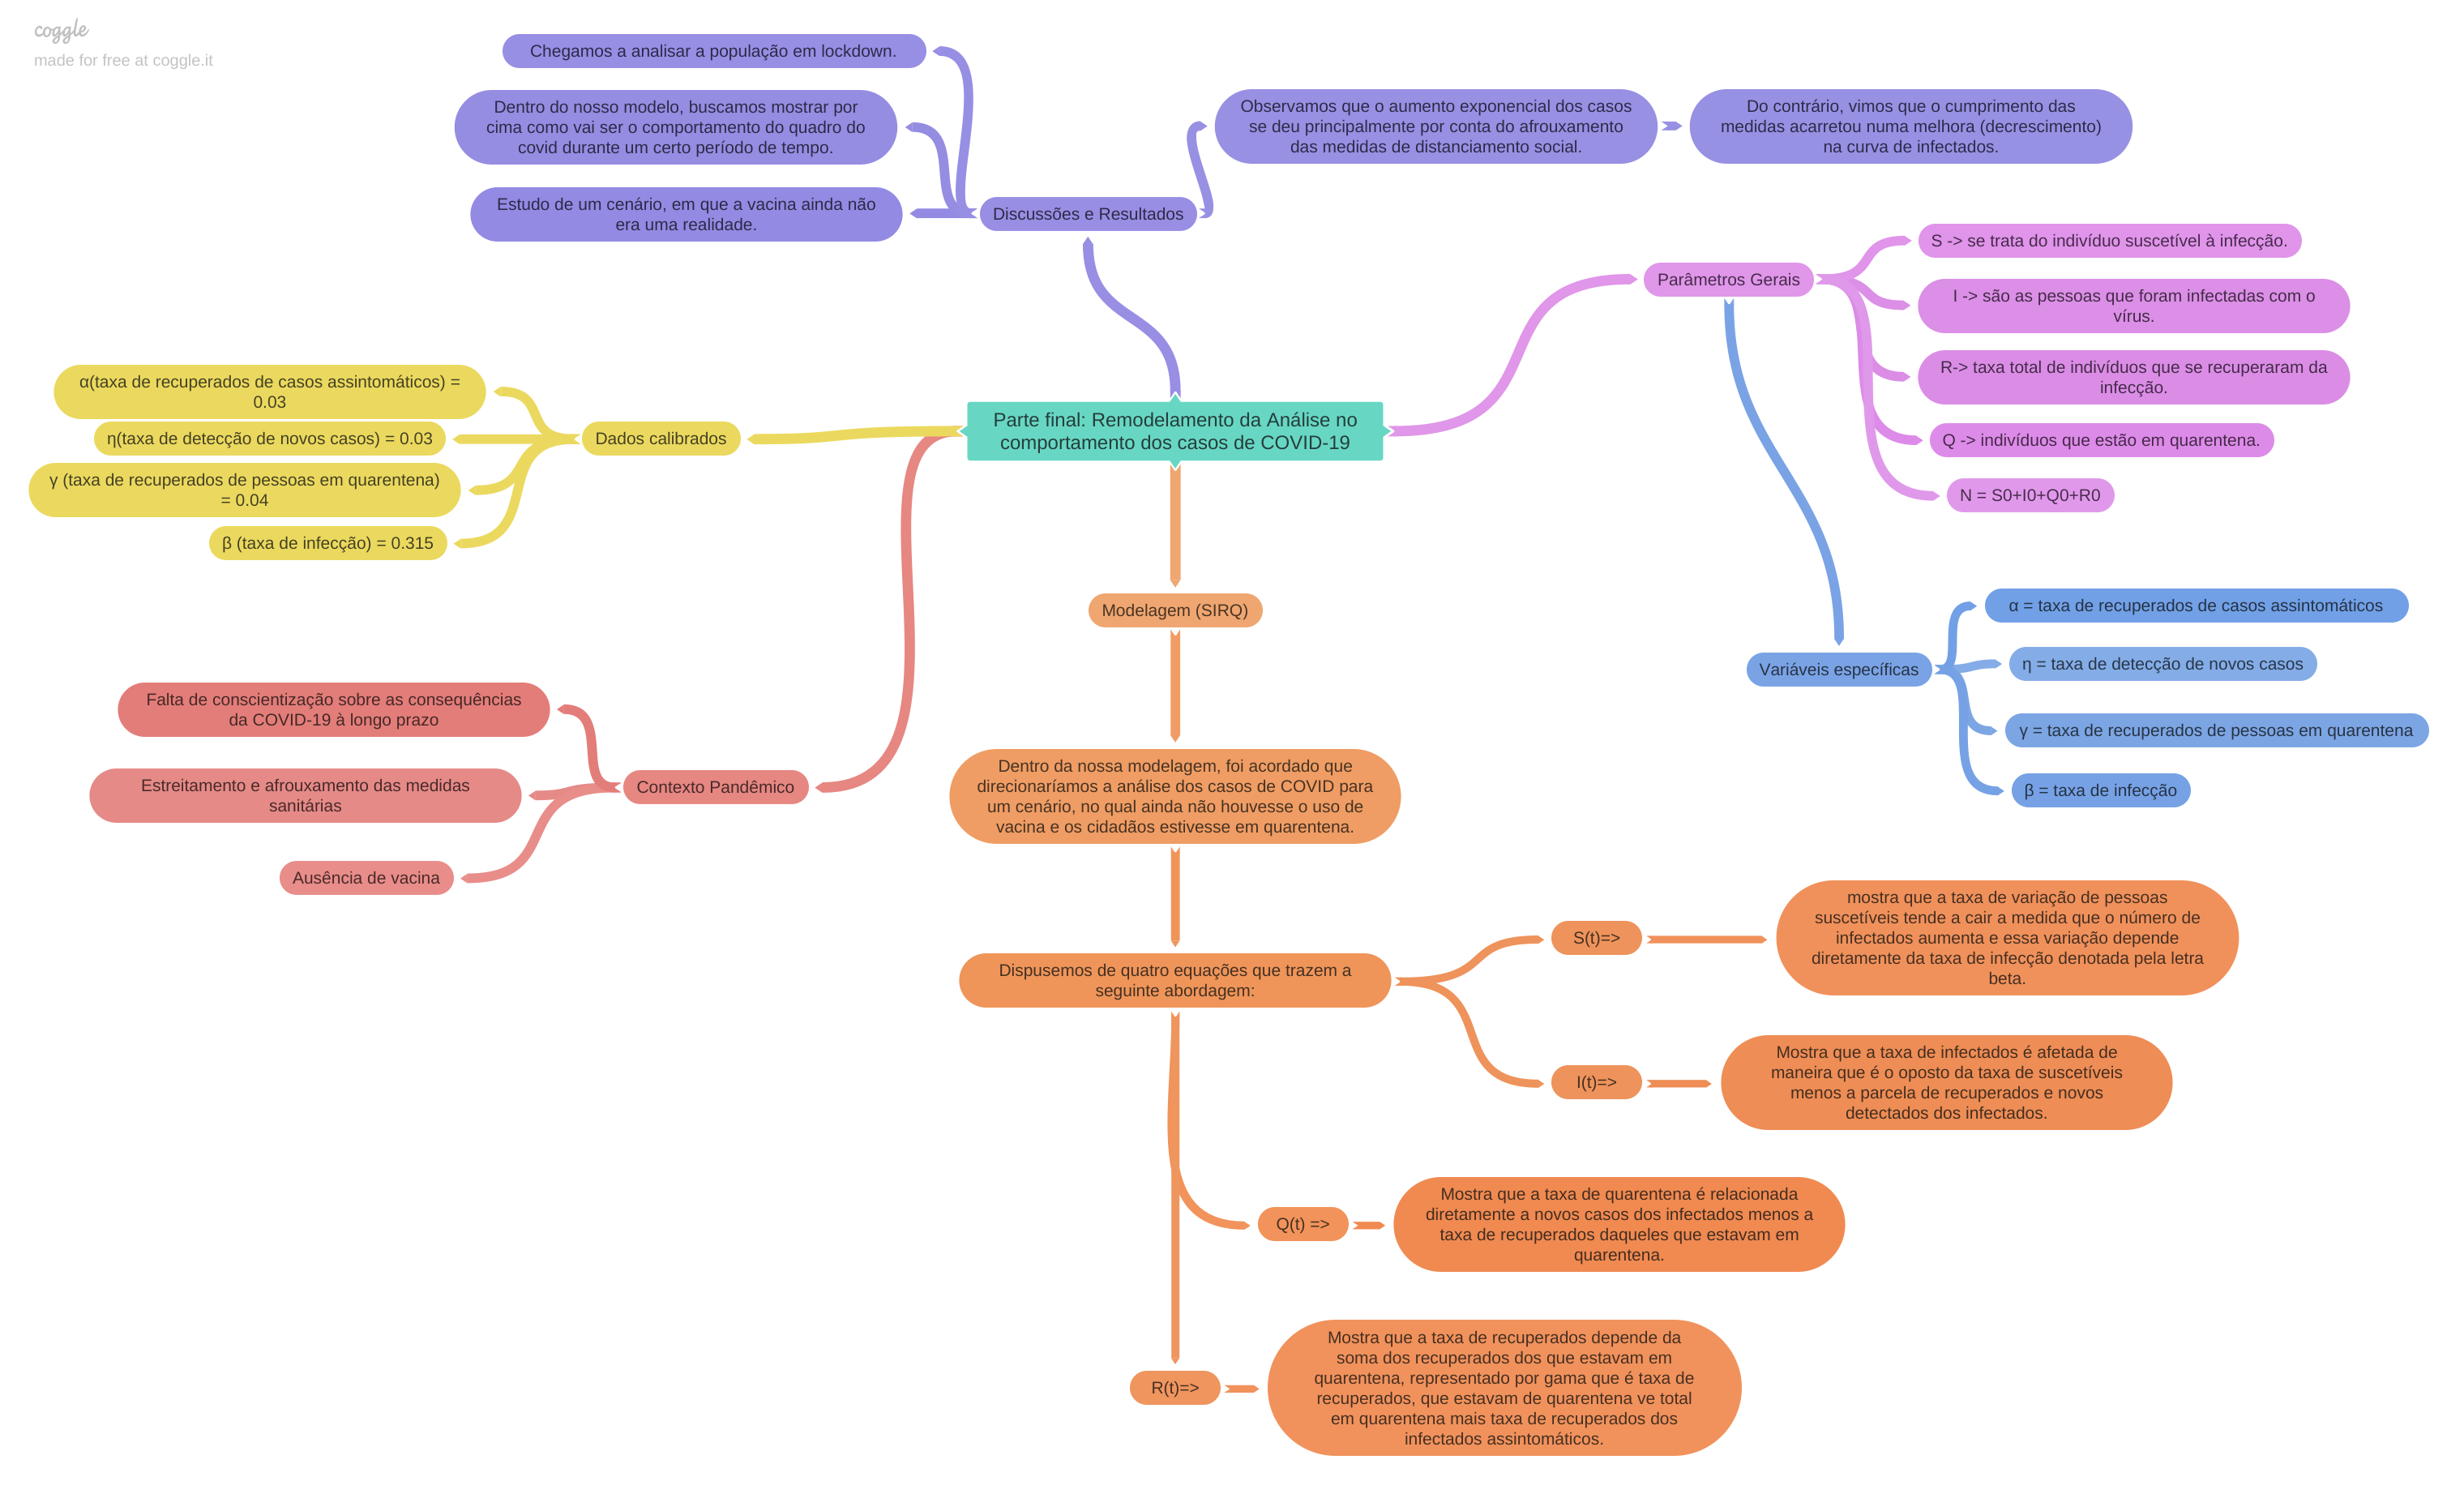

In [ ]:
from IPython.display import Image
fig = Image(filename=('/content/mapa_mental.png'))
fig

#***INTRODUÇÃO E OBJETIVOS***

Iremos usar um modedelo SIQR, o qual se trata de uma evolução do modelo SIR, pois leva em cosideração pessoas que estão em situação de quarentena, possibilitando o estudo da situação hipotética de que caso a população estivesse em lockdown. O modelo foi desenvolvido pela UFF(Universidade Federal Fluminense)[3]. Paralelo a isso, é importante ressaltar que não estamos considerando a vacinação, porque a vacinação da COVID-19 é uma situação excepcional, já que quando analisamos num panorama histórico, a vacina mais rápida a ser desenvolvida foi a da caxumba que levou cerca de 4 anos para ser liberada[4]. Portanto, buscamos estudar uma situação mais costumeira, permitindo uma análise profunda, na qual estudamos a manutenção do cenário do COVID-19, enquanto o desenvolvimento de vacinas ainda não fosse tão rápido e eficaz, como nos dias de hoje.

Esperamos que situações e contextos sociais aplicados ao longo da pandemia, bem como a quarentena, surtem efeitos positivos quando feita a análise gráfica do impacto do COVID-19 em relação à diminuição da quantidade de casos. Nesse viés, tomamos como o exemplo do distanciamento social como apresentado na figura 1:


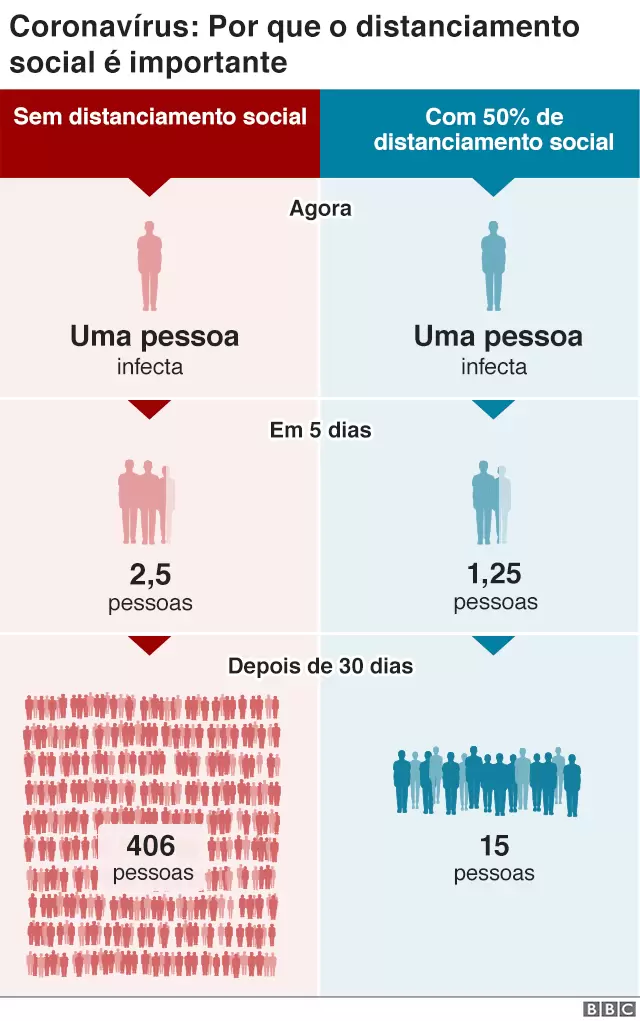

    figura 1 [5]

 Esperamos encontrar também que, a partir de fevereiro de 2021, os números serão menores que o modelo apresentado, dado que a vacinação teve seu ínicio em janeiro do mesmo ano. De, contribuindo pra uma queda como mostra a figura 2.
 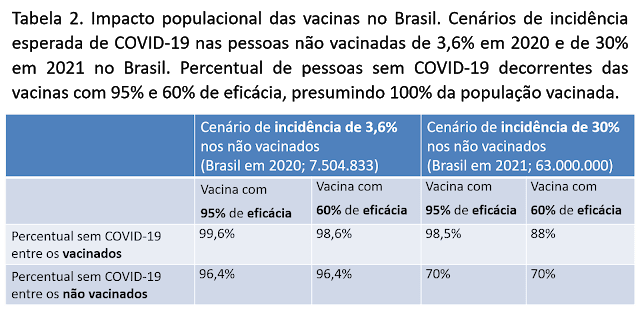

    Figura 2 [6]



# **MODELO**

O modelo a ser utilizado foi criado num estudo da propagação da COVID pela universidade federal fluminense. Como mencionado anteriormente, o modelo se baseia em um sistema de equações diferenciais que descrevem  o comportamento dos 4 subgrupos, os quais formam o ecossistema da sociedade atingida. À princípio, utilizaremos dados de Pernambuco para possibilitar a análise de uma situação hipotética na qual o Estado estivesse em quarentena e as vacinas ainda não estivem em uso.

  Primeiramente, apresentaremos o funcionamento do modelo  e logo em seguida discutiremos como cada equação do modelo SIQR serve para descrever os subgrupos.

  O sistema SIRQ mencionado é o seguinte:

  (1)\begin{aligned} \frac{d{{S}}}{dt}& =\frac{-\beta SI }{N} \end{aligned}
(2)\\begin{aligned} \frac{d{{I}}}{dt}& = \frac{\beta SI }{N} - (\alpha  + \eta )I \end{aligned}
(3)\begin{aligned} \frac{d{{Q}}}{dt}& =\eta I - \gamma Q \end{aligned}
(4)\begin{aligned} \frac{d{{R}}}{dt}& = \gamma Q + \alpha I \end{aligned}

α = taxa de recuperados de casos assintomáticos [4]

η = taxa de detecção de novos casos [4]

γ =  taxa de recuperados de pessoas em quarentena [4]

β = taxa de infecção [4]


A equação 1 mostra que a taxa de variação de pessoas suscetíveis tende a cair a medida que o número de infectados aumenta e essa variação depende diretamente da taxa de infecção denotada pela letra beta.

A equação 2  mostra que a taxa de infectados é afetada de maneira que é o oposto da taxa de suscetíveis menos a parcela de recuperados e novos detectados dos infectados.

A equação 3 mostra que a taxa de quarentena é relacionada diretamente a novos casos dos infectados menos a taxa de recuperados daqueles que estavam em quarentena.

A equação 4 mostra que a taxa de recuperados depende da soma dos recuperados dos que estavam em quarentena, representado por gama que é taxa de recuperados, que estavam de quarentena ve total em quarentena mais taxa de recuperados
dos infectados assintomáticos. 







# ***RESULTADO E DISCUSSÕES***

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [ ]:
S0= 9616621 #populacao de pernambuco em 2020 [8]
I0 = 7 #08 de março de 2020 [7]
Q0 = 0
R0 = 0
N = S0+I0+Q0+R0

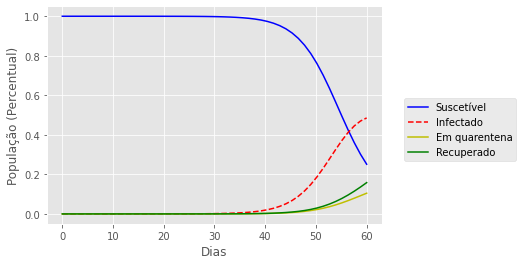

In [ ]:
def deriv(y,t):


  alfa = 0.03 
  eta = 0.03 
  gama = 0.04 
  beta = 0.315 
  S = y[0]
  I = y[1]
  Q = y[2]
  R = y[3]
  

  dSdt= (-1 * beta * S *I /N)
  dIdt = ( (beta * S * I/N) - ((alfa + eta) * I ))
  dQdt = eta * I - gama * Q
  dRdt = (gama * Q + alfa * I)

  return dSdt, dIdt, dQdt, dRdt


y0 =[S0,I0,Q0,R0]
t = np.linspace(0, 60) #em dias

y= odeint(deriv,y0,t)

A = y[:,0]
B = y[:,1]
C = y[:,2]
D = y[:,3]

plt.plot(t, A/N, 'b', label='Suscetível')
plt.plot(t, B/N, 'r--', label='Infectado')
plt.plot(t, C/N, 'y-', label='Em quarentena')
plt.plot(t, D/N, 'g', label='Recuperado')
plt.xlabel('Dias')
plt.ylabel('População (Percentual)')
plt.legend(bbox_to_anchor=(1.05, 0.6))
plt.show()

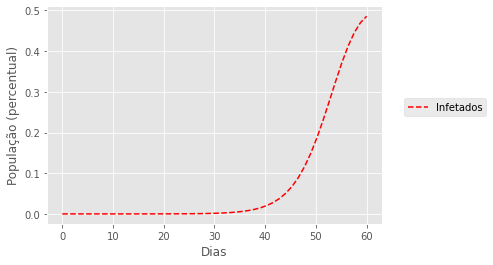

In [ ]:
y0 =[S0,I0,Q0,R0]
t = np.linspace(0, 60) #em dias

y= odeint(deriv,y0,t)

A = y[:,0]
B = y[:,1]
C = y[:,2]
D = y[:,3]

plt.plot(t, B/N, 'r--', label='Infetados')
plt.xlabel('Dias')
plt.ylabel('População (percentual)')
plt.legend(bbox_to_anchor=(1.05, 0.6))
plt.show()

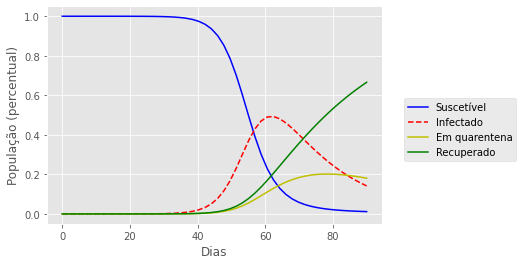

In [ ]:
y0 =[S0,I0,Q0,R0]
t = np.linspace(0, 90) #em dias

y= odeint(deriv,y0,t)

A=y[:,0]
B =y[:,1]
C =y[:,2]
D = y[:,3]

plt.plot(t, A/N, 'b', label='Suscetível')
plt.plot(t, B/N, 'r--', label='Infectado')
plt.plot(t, C/N, 'y-', label='Em quarentena')
plt.plot(t, D/N, 'g', label='Recuperado')
plt.xlabel('Dias')
plt.ylabel('População (percentual)')
plt.legend(bbox_to_anchor=(1.05, 0.6))
plt.show()

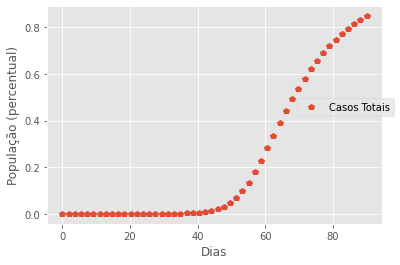

In [ ]:
plt.plot(t, (C+D)/N, 'p', label='Casos Totais')
plt.xlabel('Dias')
plt.ylabel('População (percentual)')
plt.legend(bbox_to_anchor=(1.05, 0.6))
plt.show()

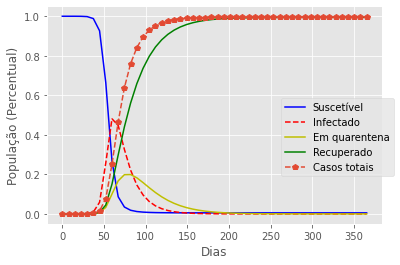

In [ ]:
#Após um ano

t = np.linspace(0, 365) #em dias

y= odeint(deriv,y0,t)

A = y[:,0]
B = y[:,1]
C = y[:,2]
D = y[:,3]
plt.plot(t, A/N, 'b', label='Suscetível')
plt.plot(t, B/N, 'r--', label='Infectado')
plt.plot(t, C/N, 'y-', label='Em quarentena')
plt.plot(t, D/N, 'g', label='Recuperado')
plt.plot(t, (C+D)/N, 'p--', label='Casos totais')
plt.xlabel('Dias')
plt.ylabel('População (Percentual)')
plt.legend(bbox_to_anchor=(1.05, 0.6))
plt.show()




Como optamos por utilizar um modelo relativamente simples, conseguimos cobrir uma realidade que seria vista no iníco do cenário da pandemia. Para isso, levamos em conta os 5 primeiros meses. Nesse viés, apenas consideramos variáveis que refletiam o dia-à-dia em relação àquela época, tais quais, medidas de quarentena relacionadas às pessoas que haveriam contraído a infecção, taxa de recuperados, taxa indivíduos suscetíveis em decorrência da interação com a massa de infectados e os indivíduos recuperados, ao longo de certo tempo.

Plotando o gráfico, com os parâmetros utilizados na pesquisa original, vemos que em 60 dias cerca de mais de 40% da população de pernambuco já teria sido infectada, o que é configurado como falso, visto que cerca de dois meses depois temos apenas 60 mil infectados no estado de pernambuco [7]. Portanto, alterando a taxa de infecção que é 30%, para cerca de 2/3 do valor obtido pelo artigo, temos um número mais aproximado de infectados naquele período sendo cerca de 0,3 por cento da população, isto é, pouco menos de 40 mil infectados, o que já aproxima do número real.

Em cem dias, temos quase 8% da população total de casos totais, isto é, cerca de 768 mil pessoas [7], enquanto que temos de acordo com os dados do SEPLAG apenas 70 mil infectados, o que demonstra que o modelo não escala bem. 

Estimando o modelo para um ano, vemos que o seu resultado é satisfatório para um modelo simples, visto que conseguimos com acurácia acertar o máximo da quarentena durante o lockdown, que ocorreram cerca de 3 meses após o início do contágio. Por outro lado, vemos que o modelo erra ao tentar prever o ápice da infecção do covid, que seria no segundo mês de contágio, o que não é verdade, pois de acordo com o SEPLAG [7] o acumulado de casos nos diz que no começo desse ano tivemos o pico de infecção, com cerca de 30 mil casos totais no primeiro mês de 2022. Portanto, podemos notar que o modelo se comporta bem para os primeiros meses do contágio, e não consegue acompanhar a longo prazo a pandemia de COVID-19 no estado de Pernambuco.


# **CONCLUSÃO**

Com as medidas adotadas, pudemos fazer uma previsão de que haveria um melhoramento quanto aos casos de COVID-19, já que era esperado que caso as medidas restritivas fossem devidamente seguidas, haveria uma baixa nos casos, e em função do tempo haveria uma queda drástica na proliferação do vírus. Tal comportamento foi representado graficamente, através do código acima.

Dado que é um modelo simples, os resultados foram bem satisfatórios, tendo em vista que nossa busca era por uma análise mais verossímil possível, dentro do escopo trabalhado. Portanto, os picos de casos ilustram um crescimento exponencial que já era esperado, já que não se havia toda essa noção do quão perigoso era o COVID-19 no começo da pandemia. No entanto, a retomada das medidas de proteção trouxe uma considerável taxa de decrescimento dos casos, o que também era esperado. Desse modo, há certa semelhança com o cenário real, em que a negligência e falta de direcionamento do Estado, quanto a uma postura concreta em relação à pandemia, causou afrouxamento nas medidas sanitárias, o que expôs o povo aos efeitos da pandemia. Dessa maneira, foi visível o aumento no número de casos e mortes em decorrência de COVID-19.

Por outro lado, a diminuição dos casos se deu quando o perigo da pandemia passou a ser tratado da devida forma que deveria ter sido desde o começo, com o isolamento social e medidas mais drásticas, tanto de quarentena quanto de distanciamento. De maneira análoga a isso, vemos que no gráfico há, de fato, uma diminuição exponencial nos casos de infecção por COVID-19, dado que houve um maior engajamento populacional quanto à proteção comum contra o vírus.

Logo, mesmo que o modelo tenha sido relativamente simples, houve uma relação bastante parecida com o quadro de COVID-19 quando estava em seu período inicial, seja no aumento exponencial, quanto nas quedas. Nesse sentido, o pico que o gráfico mostrou faz total alusão a uma parcela da realidade vivida por nós.

# **REFERÊNCIAS**

[1] https://www.paho.org/pt/covid19/historico-da-pandemia-covid-19

[2] https://news.google.com/covid19/map?hl=pt-BR&mid=%2Fm%2F02j71&gl=BR&ceid=BR%3Apt-419

[3] https://www.worldscientific.com/doi/10.1142/S0129183120501351

[4] https://guiadoestudante.abril.com.br/estudo/qual-foi-a-vacina-desenvolvida-mais-rapido-na-historia/

[5] https://www.bbc.com/portuguese/internacional-52830618

[6] https://informe.ensp.fiocruz.br/noticias/50665

[7] https://dados.seplag.pe.gov.br/apps/corona.html

[8] https://g1.globo.com/pe/pernambuco/noticia/2020/08/27/pernambuco-atinge-96-milhoes-de-habitantes-em-2020-estima-ibge.ghtml

